In [1]:
import pandas 
import torch

embs  = torch.load('openai_text-embedding-3-large_3072.pt')
embs_sub = embs[0 : int(embs.shape[0]/2)]

/Users/kiakarbasi/anaconda3/envs/kiapykt/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Find the best number of clusters using the Bayesian Information Criterion (BIC)
lowest_bic = float('inf')
best_n_components = None
max_clusters = 200  # Maximum number of clusters to try
for n_components in range(1, max_clusters + 1):
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(embs_sub)
    bic = gmm.bic(embs_sub)
    if bic < lowest_bic:
        lowest_bic = bic
        best_n_components = n_components

print(f"The best number of clusters is {best_n_components}")

# Perform clustering with the best number of components
gmm = GaussianMixture(n_components=best_n_components, random_state=0)
gmm.fit(embs_sub)
labels = gmm.predict(embs_sub)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
embs_sub_pca = pca.fit_transform(embs_sub)

# Plot the clusters in a 2D plot
plt.scatter(embs_sub_pca[:, 0], embs_sub_pca[:, 1], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering Results')
plt.show()

# Create a dataframe to store the mapping from row number to cluster
mapping_df = pd.DataFrame({'Row Number': range(embs_sub.shape[0]), 'Cluster': labels})


The best number of clusters is 150
[104  56   5 ...  72  72  72]
pca done


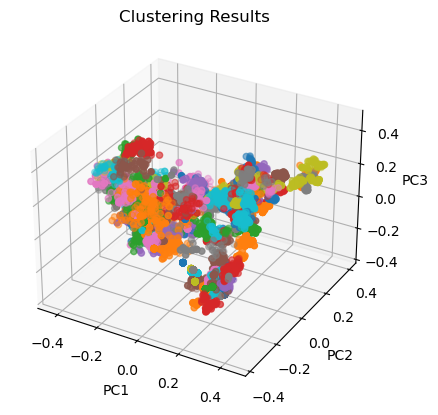

In [6]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# # Find the best number of clusters using the elbow method
# inertia = []
# max_clusters = 100  # Maximum number of clusters to try
# for n_clusters in range(1, max_clusters + 1):
#     kmeans = KMeans(n_clusters=n_clusters, random_state=0)
#     kmeans.fit(embs_sub)
#     inertia.append(kmeans.inertia_)

# # Plot the elbow curve
# plt.plot(range(1, max_clusters + 1), inertia)
# plt.xlabel('Number of Question Clusters')
# plt.ylabel('Inertia')
# plt.title('Elbow Curve')
# plt.show()

# Choose the best number of clusters based on the elbow curve
# best_n_clusters = int(input("Enter the best number of clusters: "))
best_n_clusters = 150
print(f'The best number of clusters is {best_n_clusters}')
# best_n_clusters = 44
# Perform clustering with the best number of clusters
kmeans = KMeans(n_clusters=best_n_clusters, random_state=0)
kmeans.fit(embs_sub)

print(kmeans.labels_)
# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
embs_sub_pca = pca.fit_transform(embs_sub)
print('pca done')
# Plot the clusters in a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(best_n_clusters):
    cluster_points = embs_sub_pca[kmeans.labels_ == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i+1}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
# ax.legend()
plt.title('Question Clusters (OpenAI Text Embeddings)')
plt.show()

# Create a dataframe to store the mapping from row number to cluster
mapping_df = pd.DataFrame({'Row Number': range(embs_sub.shape[0]), 'Cluster': kmeans.labels_})


In [2]:
fig = plt.figure(figsize=(12, 8), dpi=300)  # Increase figure size and resolution
ax = fig.add_subplot(111, projection='3d')
for i in range(best_n_clusters):
    cluster_points = embs_sub_pca[kmeans.labels_ == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i+1}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
# ax.legend()
plt.title('Question Clusters (OpenAI Text Embeddings)')
plt.show()

# Create a dataframe to store the mapping from row number to cluster
mapping_df = pd.DataFrame({'Row Number': range(embs_sub.shape[0]), 'Cluster': kmeans.labels_})


NameError: name 'plt' is not defined

In [3]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Find the best number of clusters using the Bayesian Information Criterion (BIC)
lowest_bic = float('inf')
best_n_components = None
max_clusters = 200  # Maximum number of clusters to try
for n_components in range(1, max_clusters + 1, 10):
    print(n_components)
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(embs_sub)
    bic = gmm.bic(embs_sub)
    if bic < lowest_bic:
        lowest_bic = bic
        best_n_components = n_components

print(f"The best number of clusters is {best_n_components}")

# Perform clustering with the best number of components
gmm = GaussianMixture(n_components=best_n_components, random_state=0)
gmm.fit(embs_sub)
labels = gmm.predict(embs_sub)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
embs_sub_pca = pca.fit_transform(embs_sub)

# Plot the clusters in a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(best_n_components):
    cluster_points = embs_sub_pca[labels == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i+1}')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.title('Clustering Results')
plt.show()

# Create a dataframe to store the mapping from row number to cluster
mapping_df = pd.DataFrame({'Row Number': range(embs_sub.shape[0]), 'Cluster': labels})


1
11
21
31
41
51
61
71
81
91
101
111
121
131


: 